# Team PHEBS

In [2]:
# import dependencies
import pandas as pd
import random
import seaborn as sns

# Letter Sequences
### 
#### AUTHOR:     Trent Brunson
* COURSE:     ANLY 615
* PROGRAM:    Abecedarian
* PURPOSE:    Determine if the word or phrase has three sequential letters.
* INPUT:      user word/phrase
* PROCESS:    treat the input as a list of characters and cycle through the list
* OUTPUT:     yes or no, the word has three sequential characters
* HONOR CODE: On my honor, as an Aggie, I have neither given nor received unauthorized aid on this academic work.
#### This was very similar to finding abecedarian words.  
* Get input
* Assign stripped user input to new variable while handling exceptions
* Iterate through the string character by character
* Return results

This was set up in a loop to allow the user to continue as long as needed.

One challenge was stripping stray characters.  Stripping for letters worked, but it did not allow for punctuation in sentences.  Then filtering spaces and allowing for special characters and numbers did not return the string until invoking the .join() method.  Another challenge was error handling logic for exceptions in the test code, which actually became easier when passing parameters amongst functions; it provided clarity and defined boundaries allowing me to focus on subsets of errors.


In [3]:
### !/usr/bin/env python3#!/usr/bin/env python3
def userInput():
    # header telling user the purpose of the program and taking input
    print("This program will determine if your phrase has three letters in sequential order.")
    entry = (input("Enter you word or phrase:\n"))
    # remove numbers, spaces and special characters; convert to all lowercase for evaluation
    # use .join to return string instead of iterable object from filter
    userWord = ''.join(filter(str.isalpha, entry)).lower()
    if len(userWord)<3:  # make sure the word is long enough for proecssing
        print("You need to enter a word or phrase longer with 3 or more characters.\n")
        entry == False
    else: pass
    return entry, userWord

def result(userWord):
    sequential = False
    i,j = 0,1 # initialize counters for loops
    for i in range(len(userWord)-1): # set length of loop to user input
        # check if letters are sequential as looping through letters of the input
        if (ord(userWord[i]) + 1) == (ord(userWord[i+1])):
            j += 1 # increment inner counter only when two letters are sequential
            if j == 3:
                # if found three sequential letters in a row, 
                # return positive result and end processing
                sequential = True
                break
        else:
            j = 1 # reset counter to start with first letter 
    return sequential

def output(expression, entry):
    if expression == True:
        print(f"{entry} has three sequential letters.\n")
    else: 
        print(f"{entry} does not have three sequential letters.\n")
    return

def main():
    choice = "Y"
    while choice.upper() == "Y":
        entry, compressedEntry = userInput()
        # cycle to top of loop if entry isn't long enough to evaluate three characters
        if entry == False:
            continue
        valid = result(compressedEntry)
        output(valid,entry)
        choice = input("Would you like to try again? (Y/N) ")
    return

if __name__ == "__main__":
    main()

This program will determine if your phrase has three letters in sequential order.
hello does not have three sequential letters.

This program will determine if your phrase has three letters in sequential order.
Hi John has three sequential letters.

This program will determine if your phrase has three letters in sequential order.
Hi, John has three sequential letters.

This program will determine if your phrase has three letters in sequential order.
You need to enter a word or phrase longer with 3 or more characters.

as does not have three sequential letters.



# MLB Games 2019
AUTHOR: Jonathan Hewlett
* COURSE: ANLY 615
* PROGRAM: mlb-games-2019
* PURPOSE: Calculate % of games won by each team
* INPUT: CSV file with data from 2019 MLB regular season
* PROCESS: Use pandas to read csv file, then calculate wins/total, then sort accordingly
* OUTPUT: Team Name, wins, losses, division, games WON %
* HONOR CODE: On my honor, as an Aggie, I have neither given nor received unauthorized aid on this academic work
- **Load the MLB data from CSV file**
- **Calculate % won - based on wins/total games**
- **Sort by Division, then games won %**
## Difficulties experienced:
- **CSV file** - Forgot to put the csv file in the same path as this code
- **Markdowns** - Needed to watch some Youtube videos to learn how to use different types of Markdowns
- **Sorting** - There was an added degree of difficulty while sorting by 1st 'division', then 'game won %'

In [7]:
# * Load the MLB data from CSV file
# * Calculate % won - based on wins/total games
# * Sort by Division, then games won %
def main():
    # load data from mlb
    mlb_data = pd.read_csv("data\mlb-games-2019.csv", names=('team name', 'wins', 'losses', 'division'))
    # add won %
    mlb_data['game won percentage'] = round(mlb_data['wins']/(mlb_data['wins'] + mlb_data['losses'])* 100,2)
    # sort on ascending order by division first and descending order by percent of games won
    mlb_data = mlb_data.sort_values(["division", "game won percentage"], ascending = (True, False))
    mlb_data = mlb_data.reset_index(drop=True)
    # export to csv
    mlb_data.to_csv(r'mlb-division-standings-2019.csv', index = False, header=True)
    return mlb_data

if __name__ == '__main__':
    m = main()
    print(m)

              team name  wins  losses    division  game won percentage
0             Minnesota   101      61  AL Central                62.35
1             Cleveland    93      69  AL Central                57.41
2     Chicago White Sox    72      89  AL Central                44.72
3           Kansas City    59     103  AL Central                36.42
4               Detroit    47     114  AL Central                29.19
5      New York Yankees   103      59     AL East                63.58
6             Tampa Bay    96      66     AL East                59.26
7                Boston    84      78     AL East                51.85
8               Toronto    67      95     AL East                41.36
9             Baltimore    54     108     AL East                33.33
10              Houston   107      55     AL West                66.05
11              Oakland    97      65     AL West                59.88
12                Texas    78      84     AL West                48.15
13   L

# Beat the Odds

### We created a program to roll two dice 10,000 times in sets of 24 to see how many double sixes turn up.  Then we evaluated it against the probability calculations that says in 24 rolls of the dice, you should see a double six at least once 49% of the time.

### Creating the list to record the rolls was straightforward; there were differnces when generating two output files via two different functions.  These returned different values (looking back, that is expected or else the random generator called is not random enough).  After working with a team mate, we collapsed those functions into one.  We used the file as inputs instead of passing parameters between functions.

### Finally, the program reports the results and visualizes the data in histograms and the distributions of the values was very, very even.  This model aligns very well with the probability calcuclations that double sixes will occur (35/36)^24, or about 49% of the time.


AUTHOR: Chirag Patel
* COURSE: ANLY 615
* PROGRAM: Probability of Doubles
* PURPOSE: Track and report on the results of 240,000 rolls of two dice.  What are the odds?
* INPUT: Random number generator
* PROCESS: Use random number generator to simulate two dice; record the results; analyze and display the reulsts.  Using pandas for some calculations and data manipulation.
* OUTPUT: Three files to record the results of the rolls and save the analysis.
* HONOR CODE: On my honor, as an Aggie, I have neither given nor received unauthorized aid on this academic work


You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.
Here is the distribution of values for the first die...fairly equal odds as expected.
see image ('images\die1_rolls.png')
Here is the distribution of values for the second die...fairly equal odds as expected.
see image ('images\die2_rolls.png')
You rolled doubles 39,708 times, or 16.55% of the time.
You rolled double sixes 6,583 times, or 2.74% of the time.

In 24 rolls, you typically see double sixes about 49% of the time.
In your 10,000 sets of 24 dice rolls you rolled double sixes 48.21% of the time.

Your results are in the range of what is expected.




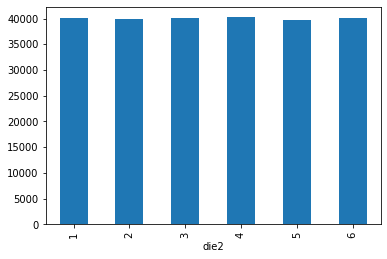

In [5]:
def rolldice(): #This function gets generates 240,000 dice rolls
    # import random
    dieOne = 0
    dieTwo = 0
    doubleSix = 0
    totalDoubleSix = 0
    six = 6
    line=""
    one = 1
    zero = 0
    listc = []
    lofl = []
    gline=""
    # open files to write to them
    with open("roll.csv", "w") as wfile:
        with open("gambler.csv", "w") as gfile:        
            for i in range(1,10001): # generate 10,000 sets of rolls
                line=""
                listc = []
                gline=""
                doubleSix = 0
                gline = str(i) + "," 
                for dice in range(1,25): # generate 24 dice rolls
                    line=""
                    dieOne = random.randint(1, 6)
                    dieTwo = random.randint(1, 6)
                    line = str(i) + "," + str(dice) + "," + str(dieOne) + "," + str(dieTwo) + "," 
                    if dieOne == dieTwo: # finds both die has same number
                        line = line + str(one) + ","
                    else:
                        line = line + str(zero) + ","

                    if dieOne == six and dieTwo == six: # finds both die has number six
                        line = line + str(one) 
                        doubleSix += 1
                        totalDoubleSix += 1
                    else:
                        line = line + str(zero)
                    listc.append(line)
                    wfile.write(f"{line}\n")
                if doubleSix >= 1: # determine who wins and record it
                    gline = str(i) + "," + "True" + "," + "Gambler" + "," + str(doubleSix)
                else:
                    gline = str(i) + "," + "False" + "," + "House" + "," + str(zero)
                gfile.write(f"{gline}\n")
            lofl.append(listc)            
        gfile.close()
    wfile.close()

def analytics():
    # import pandas as pd
    # loading data for analysis
    # creating tables to evaluate the distribution of rolls
    gamblerDF = pd.read_csv('gambler.csv', names=['group','double_six','winner','double_sixes'])
    rollDF = pd.read_csv('roll.csv', names=(
        'round_num', 'roll_num', 'die1', 'die2', 'doubles', 'double_six'))
    # saving images of the die value histograms for the user to examine
    a = rollDF.groupby('die1')['die1'].agg('count').plot.bar()
    a.figure.savefig('images\die1_rolls.png')
    b = rollDF.groupby('die2')['die2'].agg('count').plot.bar()
    b.figure.savefig('images\die2_rolls.png')
    # getting totals for stats calcs
    double6 = rollDF['double_six'].sum()
    doubles = rollDF['doubles'].sum()
    setDoubles = gamblerDF[gamblerDF.winner == 'Gambler'].count()['winner']
    # displaying output to user
    print(
        f"You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.\n"
        f"Here is the distribution of values for the first die...fairly equal odds as expected.\n"
        f"see image ('images\die1_rolls.png')\n"
        f"Here is the distribution of values for the second die...fairly equal odds as expected.\n"
        f"see image ('images\die2_rolls.png')\n"
        f"You rolled doubles {doubles:,} times, or {doubles/240000:.2%} of the time.\n"
        f"You rolled double sixes {double6:,} times, or {double6/240000:.2%} of the time.\n\n"
        f"In 24 rolls, you typically see double sixes about 49% of the time.\n"
        f"In your 10,000 sets of 24 dice rolls you rolled double sixes {setDoubles/10000:.2%} of the time.\n"    
        )
    if (setDoubles/10000) > .5:
        print("Book your flight to Vegas, baby!\n\n")
    elif (double6/10000) > .4:
        print("Your results are in the range of what is expected.\n\n")
    else:
        print("Better luck next time.\n\n")
    # take the outputs and saving the same output to a txt file, and directing user to saved image locations.
    with open('stats.txt', 'w') as f:
        f.write(
            f"You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.\n"
            f"The distribution of values for the first die...fairly equal odds as expected.\n"
            f"see image ('images\die1_rolls.png')\n"
            f"The distribution of values for the second die...fairly equal odds as expected.\n"
            f"see image ('images\die2_rolls.png')\n"
            f"You rolled doubles {doubles:,} times, or {doubles/240000:.2%} of the time.\n"
            f"You rolled double sixes {double6:,} times, or {double6/240000:.2%} of the time.\n\n"
            f"In 24 rolls, you typically see double sixes about 49% of the time.\n"
            f"In your 10,000 sets of 24 dice rolls you rolled double sixes {setDoubles/10000:.2%} of the time.\n"
        )
        if (setDoubles/10000) > .5:
            f.write("Book your flight to Vegas, baby!\n\n")
        elif (double6/10000) > .4:
            f.write("Your results are in the range of what is expected.\n\n")
        else:
            f.write("Better luck next time.\n\n")

    return

def main():
    rolldice()
    analytics()

if __name__ == "__main__":
    main()